In [1]:
#data preprocessing

#importing the libraries
import os
from pathlib import Path
import pandas as pd
df = pd.read_csv("KDD_Train.csv")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df.shape

(125973, 42)

In [3]:
print(df.shape)
df.head(5)

(125973, 42)


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [4]:
#DATA PREPROCESSING 
df.replace(('normal','anomaly'), (0,1), inplace=True)
df.head(5)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  class  
0                      0.00      0  
1                      0.00      0  
2                      0.00      1  
3                      0.01      0  
4                      0.00      0  

[5 rows x 42 columns]

In [5]:
#CATEGORICAL FEATURES 
for column_name in df.columns:
    if df[column_name].dtypes=='object':
        a =df[column_name].unique()
        a=len(a)
        #print(a)
        print(column_name+ " has "+ str(a) +" unique values. ")


protocol_type has 3 unique values. 
service has 70 unique values. 
flag has 11 unique values. 


In [6]:
#CONVERT CATEGORICAL DATA INTO BINARY VARIABLES BY ONE HOT ENCODING
df['protocol_type'].head(5)

0    tcp
1    udp
2    tcp
3    tcp
4    tcp
Name: protocol_type, dtype: object

In [7]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [8]:
print(pd.get_dummies(df['protocol_type']).head(5))

   icmp  tcp  udp
0     0    1    0
1     0    0    1
2     0    1    0
3     0    1    0
4     0    1    0


In [9]:
def dummy_df(df):
    todummy_list = ['protocol_type', 'service','flag']
    for x in todummy_list:
        #dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        #dummy_na=False: If false NaNs are ignored. If true, add col to indicate Nans
        dummies=pd.get_dummies(df[x],dummy_na=False)
        df = df.drop(x, 1)
        #Drop label coln.
        df = pd.concat([df, dummies], axis=1)
        #concat along columns.
    return df

In [10]:
#Appling one hot encoding function
df = dummy_df(df)
df.head(5)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  REJ  RSTO  RSTOS0  \
0                  0          0                0  ...    0     0       0   
1                  0          0                0  ...    0     0       0   
2                  0          0                0  ...    0     0       0   
3                  0          1                0  ...    0     0       0   
4                  0          1                0  ...    0     0       0   

   RSTR  S0  S1  S2  S3  SF  SH  
0     0   0   0   0   0   1   0  
1     0   0   0   0   0   1   0  
2     0   1   0   0   0   0   0  
3     0   0   0   0   0   1   0  
4     0   0   0   0   0   1   0  

[5 rows x 123 columns]

In [11]:
# Checking how much of my data is missing?
df.isnull().sum().sort_values(ascending=False).head()

SH                             0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dtype: int64

In [12]:
# Impute missing values using Imputer in sklearn.preprocessing

import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr.fit(df)
df = pd.DataFrame(data=imr.transform(df), columns=df.columns)


In [13]:
df.isnull().sum().sort_values(ascending=False).head()

SH                             0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dtype: int64

In [14]:
X = df.drop ('class', 1) # Dropping target, train_features = train.iloc[:,:41]
y = df['class'] #train_target = train.class 
X.shape

(125973, 122)

In [15]:
#Split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(94479,)
(94479, 122)
(31494,)
(31494, 122)


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [18]:
dtc.predict(X_train)

array([1., 0., 0., ..., 1., 0., 0.])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score = (cross_val_score(dtc, X_train, y_train,  scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=2)

from sklearn.metrics import confusion_matrix
confusion_matrix = (confusion_matrix(y_train, y_train_pred))

from sklearn.metrics import precision_score, recall_score
precision_score = (precision_score(y_train, y_train_pred))
recall_score = (recall_score(y_train, y_train_pred)) 

from sklearn.metrics import f1_score
f1_score = (f1_score(y_train, y_train_pred))

In [20]:
print('cross_val_score:',cross_val_score)
print('confusion_matrix:',confusion_matrix)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

cross_val_score: [0.9982536  0.99814776 0.9982536  0.99841236 0.99777719]
confusion_matrix: [[50309   125]
 [  127 43918]]
precision_score: 0.9971618645414708
recall_score: 0.9971165853104779
f1_score: 0.9971392244119518


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X_train, y_train)

#svm_clf.predict(X_train)
prediction = svm_clf.predict(X_train)
svm_clf.score(X_train, y_train) 

0.9764815461636978

In [22]:
svm_clf.score(X_test, y_test) 

0.9772972629707246

[ 6.17673646 -2.52336227 -1.86203487 ...  7.69274098 -2.37897067
 -3.10477009]


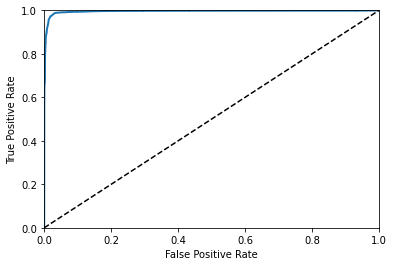

In [26]:
from sklearn.metrics import roc_curve,plot_roc_curve
import matplotlib.pyplot as plt

y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3, method="decision_function")
print(y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr, 'SVM' )
plt.show()